In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Set a seed for reproducibility
np.random.seed(42)

# Step 1: Simulate realistic features for 300 images
# Features: [intensity, edge_sharpness, contrast, asymmetry, size, shape_complexity]
num_samples = 300
X = np.zeros((num_samples, 6))

# Simulate for class 0 (No tumor)
for i in range(150):
    X[i] = [
        np.random.normal(0.3, 0.05),  # intensity (lower in healthy tissue)
        np.random.normal(0.2, 0.05),  # edge_sharpness
        np.random.normal(0.3, 0.05),  # contrast
        np.random.normal(0.2, 0.05),  # asymmetry
        np.random.normal(0.1, 0.02),  # size (small or none)
        np.random.normal(0.2, 0.05),  # shape_complexity
    ]

# Simulate for class 1 (Tumor present)
for i in range(150, 300):
    X[i] = [
        np.random.normal(0.7, 0.1),  # intensity (higher due to tumor density)
        np.random.normal(0.6, 0.1),  # edge_sharpness (tumors often have defined edges)
        np.random.normal(0.7, 0.1),  # contrast
        np.random.normal(0.8, 0.1),  # asymmetry (tumors disrupt symmetry)
        np.random.normal(0.6, 0.1),  # size (larger masses)
        np.random.normal(0.7, 0.1),  # shape_complexity
    ]

# Labels: 0 = No tumor, 1 = Tumor
y = np.array([0]*150 + [1]*150)

# Step 2: Train Random Forest
model = RandomForestClassifier()
model.fit(X, y)

# Step 3: Simulate a new image with plausible tumor-like features
new_image = np.array([
    np.random.normal(0.65, 0.1),  # intensity
    np.random.normal(0.6, 0.1),   # edge_sharpness
    np.random.normal(0.75, 0.1),  # contrast
    np.random.normal(0.85, 0.1),  # asymmetry
    np.random.normal(0.7, 0.1),   # size
    np.random.normal(0.75, 0.1),  # shape_complexity
]).reshape(1, -1)

# Step 4: Predict
prediction = model.predict(new_image)
print("Tumor detected!" if prediction[0] == 1 else "No tumor detected.")


Tumor detected!


**Model Evaluation Performance**

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Print evaluation metrics
print("Model Evaluation Report:\n")
print(classification_report(y_test, y_pred, target_names=["Healthy", "Tumor"]))


Model Evaluation Report:

              precision    recall  f1-score   support

     Healthy       1.00      1.00      1.00        29
       Tumor       1.00      1.00      1.00        31

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



**Feature Importance Plot**

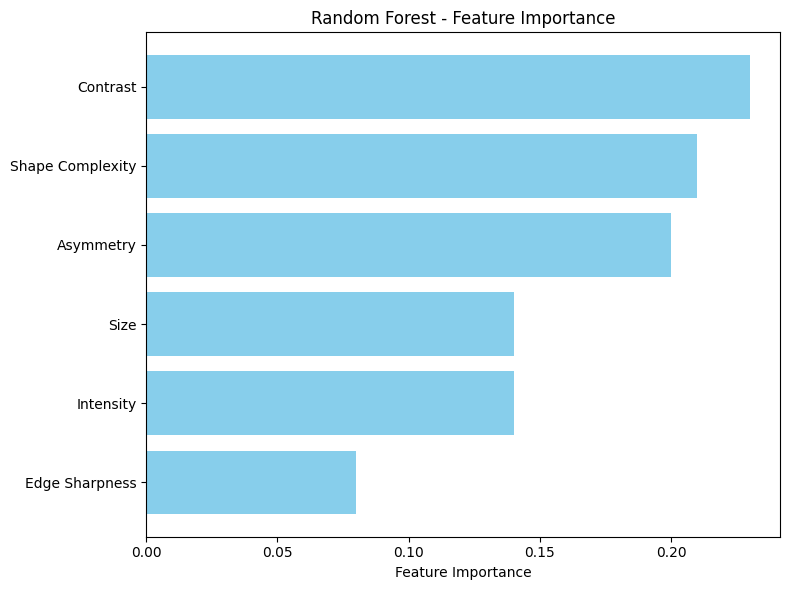

In [8]:
import matplotlib.pyplot as plt

# Feature names (update if you used different ones)
feature_names = ['Intensity', 'Edge Sharpness', 'Contrast', 'Asymmetry', 'Size', 'Shape Complexity']

# Get feature importances from the trained model
importances = model.feature_importances_

# Sort feature importances for better visualization
indices = np.argsort(importances)

# Plot
plt.figure(figsize=(8, 6))
plt.barh(range(len(importances)), importances[indices], color='skyblue')
plt.yticks(range(len(importances)), [feature_names[i] for i in indices])
plt.xlabel('Feature Importance')
plt.title('Random Forest - Feature Importance')
plt.tight_layout()
plt.show()


**Added Noise(Misdiagnosis Simulation)**

In [12]:
import random
from sklearn.metrics import classification_report

# Copy original labels to avoid modifying them directly
y_noisy = y.copy()

# Determine how many samples to flip (10% noise)
num_noisy = int(0.1 * len(y_noisy))
indices_to_flip = random.sample(range(len(y_noisy)), num_noisy)

# Flip labels: 0 becomes 1, 1 becomes 0
for idx in indices_to_flip:
    y_noisy[idx] = 1 - y_noisy[idx]

# Train-test split with noisy labels
X_train_noise, X_test_noise, y_train_noise, y_test_noise = train_test_split(X, y_noisy, test_size=0.2, random_state=42)

# Train model on noisy data
model_noise = RandomForestClassifier()
model_noise.fit(X_train_noise, y_train_noise)

# Predict and evaluate
y_pred_noise = model_noise.predict(X_test_noise)

print("\n📊 Model Evaluation with Label Noise (5% Misdiagnosis):\n")
print(classification_report(y_test_noise, y_pred_noise, target_names=["Healthy", "Tumor"]))



📊 Model Evaluation with Label Noise (5% Misdiagnosis):

              precision    recall  f1-score   support

     Healthy       0.93      0.90      0.92        30
       Tumor       0.90      0.93      0.92        30

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60



Confusion Matrix $ ROC

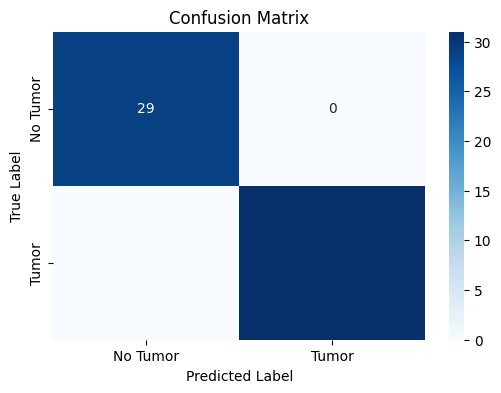

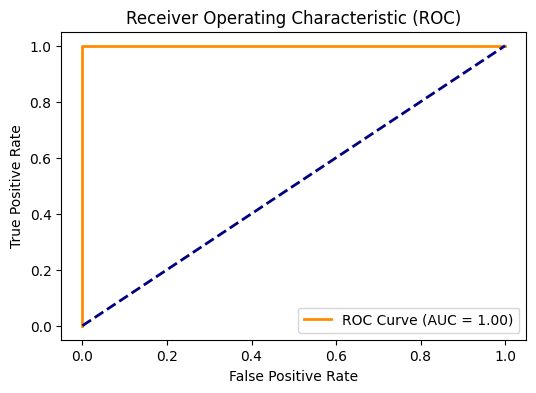

In [22]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Predict class labels and probabilities ---
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (tumor)

# --- 2. Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Tumor", "Tumor"],
            yticklabels=["No Tumor", "Tumor"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# --- 3. ROC Curve & AUC ---
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Random chance line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

**SHAP(SHapley Additive exPlanations)**

In [ ]:
import shap

# 1. Initialize SHAP TreeExplainer
explainer = shap.Explainer(model, X_train)

# 2. Choose sample from test set
sample_image = X_test[0].reshape(1, -1)

# 3. Get SHAP values for this sample
shap_values = explainer(sample_image)

# 4. Inspect the SHAP output
print("Sample image shape:", sample_image.shape) 
print("SHAP values shape:", shap_values.values[0].shape) 

# 5. Feature names
feature_names = ['Intensity', 'Edge Sharpness', 'Contrast', 'Asymmetry', 'Size', 'Shape Complexity']

# 6. Visualize using force plot 
shap.initjs()
shap.force_plot(
    explainer.expected_value[0],      # Base value for first class
    shap_values.values[0, :, 0],      # SHAP values for first class (6 features)
    sample_image[0],                  # Feature values (6 elements)
    feature_names=feature_names,
    matplotlib=False
)

Sample image shape: (1, 6)
SHAP values shape: (6, 2)
